In [3]:
import numpy as np
import matplotlib.pyplot as plt
# Helper function
def im2col(input_data, filter_h, filter_w, stride=1, pad=0):
    """다수의 이미지를 입력받아 2차원 배열로 변환한다(평탄화).

    Parameters
    ----------
    input_data : 4차원 배열 형태의 입력 데이터(이미지 수, 채널 수, 높이, 너비)
    filter_h : 필터의 높이
    filter_w : 필터의 너비
    stride : 스트라이드
    pad : 패딩

    Returns
    -------
    col : 2차원 배열
    """
    N, C, H, W = input_data.shape
    out_h = (H + 2*pad - filter_h)//stride + 1
    out_w = (W + 2*pad - filter_w)//stride + 1

    img = np.pad(input_data, [(0,0), (0,0), (pad, pad), (pad, pad)], 'constant')
    col = np.zeros((N, C, filter_h, filter_w, out_h, out_w))

    for y in range(filter_h):
        y_max = y + stride*out_h
        for x in range(filter_w):
            x_max = x + stride*out_w
            col[:, :, y, x, :, :] = img[:, :, y:y_max:stride, x:x_max:stride]

    col = col.transpose(0, 4, 5, 1, 2, 3).reshape(N*out_h*out_w, -1)
    return col

In [6]:
# Convolution Layer 구현
class Convolution_Layer:
    def __init__(self, W, b, stride=1, pad=0):
        self.W = W
        self.b = b
        self.stride = stride
        self.pad = pad

    def forward(self, x):
        # x: (N, C, IH, IW)
        KN, C, KH, KW = self.W.shape
        N, C, IH, IW = x.shape

        ### TODO! - 패딩을 고려한 feature map의 크기 계산 ###
        out_h =(IH-KH+2*self.pad)//self.stride+1
        out_w =(IW-KW+2*self.pad)//self.stride+1
        ###############################################
        col = im2col(x, KH, KW, self.stride, self.pad)
        col_W = self.W.reshape(KN, -1).T    # 필터(커널) 전개
        out = np.dot(col, col_W) + self.b

        out = out.reshape(N, out_h, out_w, -1).transpose(0, 3, 1, 2) # 왜 이렇게 바꿀까요?

        return out

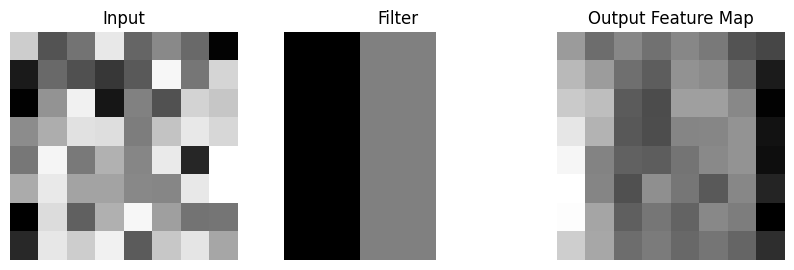

In [7]:
# 예시 입력: 간단한 흑백 이미지 (1채널)
x = np.random.rand(1, 1, 8, 8)

# 필터: 엣지 검출 커널 (Sobel과 유사)
W = np.array([[[[-1, 0, 1],
                [-1, 0, 1],
                [-1, 0, 1]]]])  # (FN=1, C=1, 3, 3)
b = np.array([0])

conv = Convolution_Layer(W, b, stride=1, pad=1)
out = conv.forward(x)

# --- 시각화 ---
plt.figure(figsize=(10, 3))
plt.subplot(1, 3, 1)
plt.title("Input")
plt.imshow(x[0, 0], cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("Filter")
plt.imshow(W[0, 0], cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("Output Feature Map")
plt.imshow(out[0, 0], cmap='gray')
plt.axis('off')

plt.show()